In [ ]:
# Imports
import keras
from keras.datasets import fashion_mnist
from keras import layers
from keras import Sequential
from keras.layers import Dense

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import confusion_matrix

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.regularizers import L1, L2, L1L2



#Load Data

In [ ]:
# load in the data
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


#Exploring Fashion MNIST Data

In [ ]:
# Data shape for test and train x
# 60,000 images within the training set
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)


In [ ]:
# Data shape for test and train y
# 10,000 images within the test set
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

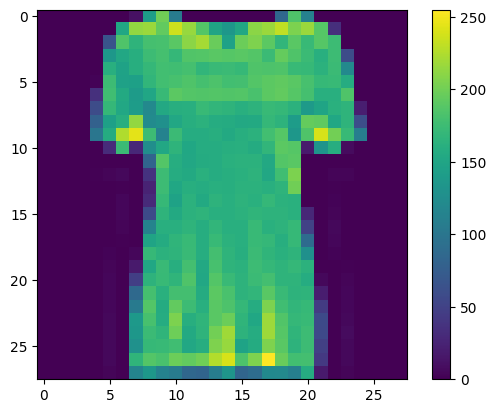

In [ ]:
plt.figure()
plt.imshow(x_train[10])
plt.colorbar()
plt.grid(False)
plt.show()

#Preprocessing Data

In [ ]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# One hot encode the output data
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
class_counts = np.sum(y_train, axis=0)
print(class_counts)

[6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000. 6000.]


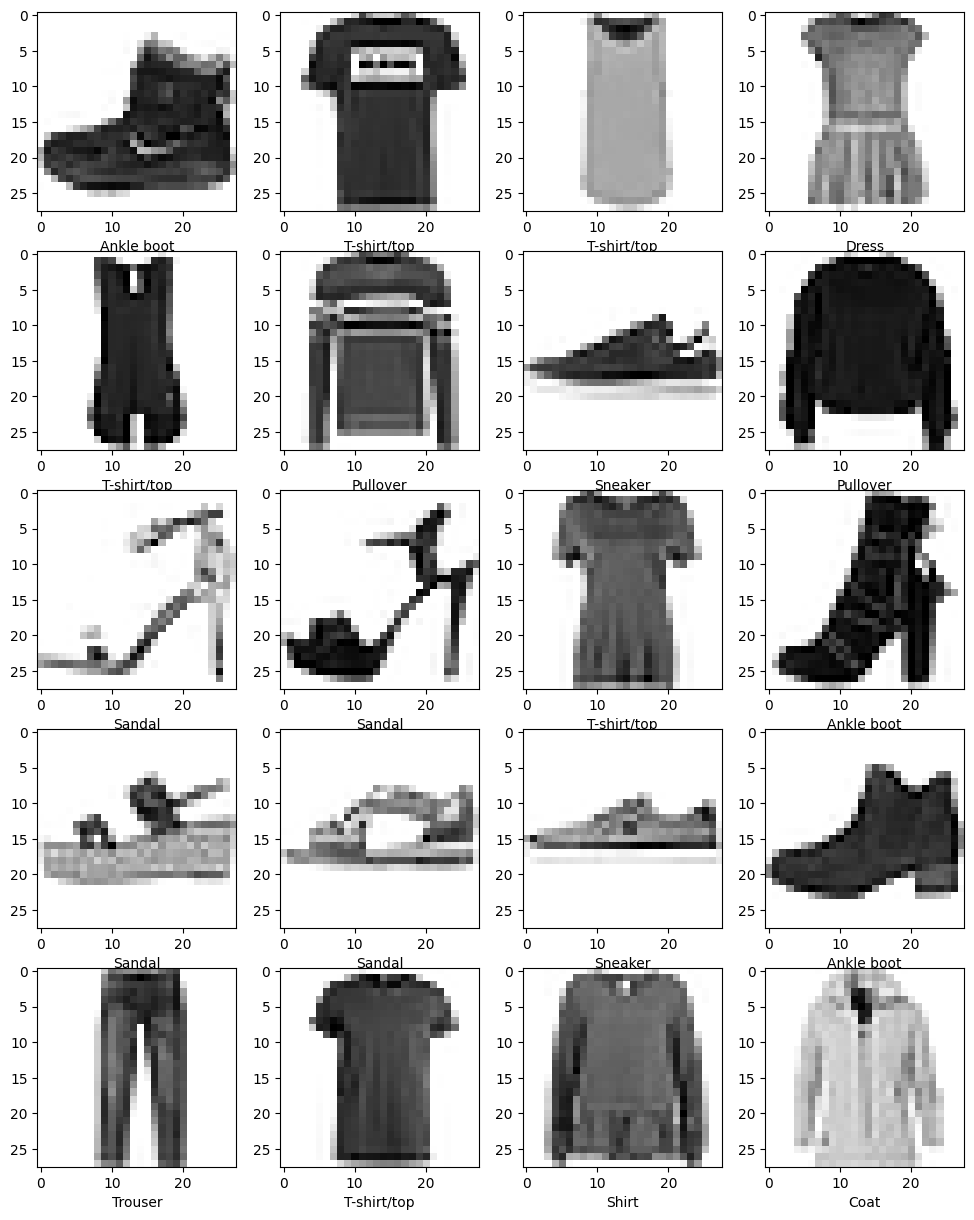

In [ ]:
plt.figure(figsize=(12,15))
for i in range(20):
  plt.subplot(5, 4, i+1)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(labels[np.argmax(y_train[i])])
plt.show()

#Model 3

In [ ]:


model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=200, input_dim=4, activation='relu'))
Dropout(0.2),
model.add(Dense(units=100, activation='relu', kernel_regularizer=L1(0.01)))
model.add(Dense(units=50, activation='relu', kernel_regularizer=L1(0.01)))
model.add(Dense(units=10, activation='softmax'))

optimizer = Adam(learning_rate=0.01)


In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 200)               157000    
                                                                 
 dense_37 (Dense)            (None, 100)               20100     
                                                                 
 dense_38 (Dense)            (None, 50)                5050      
                                                                 
 dense_39 (Dense)            (None, 10)                510       
                                                                 
Total params: 182660 (713.52 KB)
Trainable params: 182660 (713.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train,  batch_size=100, epochs=20, callbacks=[early_stop], validation_data=(x_test, y_test))

Epoch 1/20
600/600 [==============================] - 6s 8ms/step - loss: 3.3357 - accuracy: 0.7543 - val_loss: 1.0263 - val_accuracy: 0.7877
Epoch 2/20
600/600 [==============================] - 4s 7ms/step - loss: 0.8638 - accuracy: 0.8197 - val_loss: 0.7982 - val_accuracy: 0.8192
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.7344 - accuracy: 0.8326 - val_loss: 0.7211 - val_accuracy: 0.8286
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.6774 - accuracy: 0.8402 - val_loss: 0.6951 - val_accuracy: 0.8259
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.6402 - accuracy: 0.8451 - val_loss: 0.6708 - val_accuracy: 0.8321
Epoch 6/20
600/600 [==============================] - 6s 9ms/step - loss: 0.6175 - accuracy: 0.8496 - val_loss: 0.6497 - val_accuracy: 0.8344
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.5980 - accuracy: 0.8526 - val_loss: 0.6318 - val_accuracy: 0.8371
Epoch

#Evaluation

In [ ]:
# measure accuracy
test_loss, test_acc=model.evaluate(x_test, y_test)
print("test accuracy:",test_acc)

In [ ]:
# Predict the class probabilities for the test set
y_pred_probs = model.predict(x_test)

# Convert the predictions from one-hot encoded vectors to integers
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)


313/313 [==============================] - 1s 3ms/step


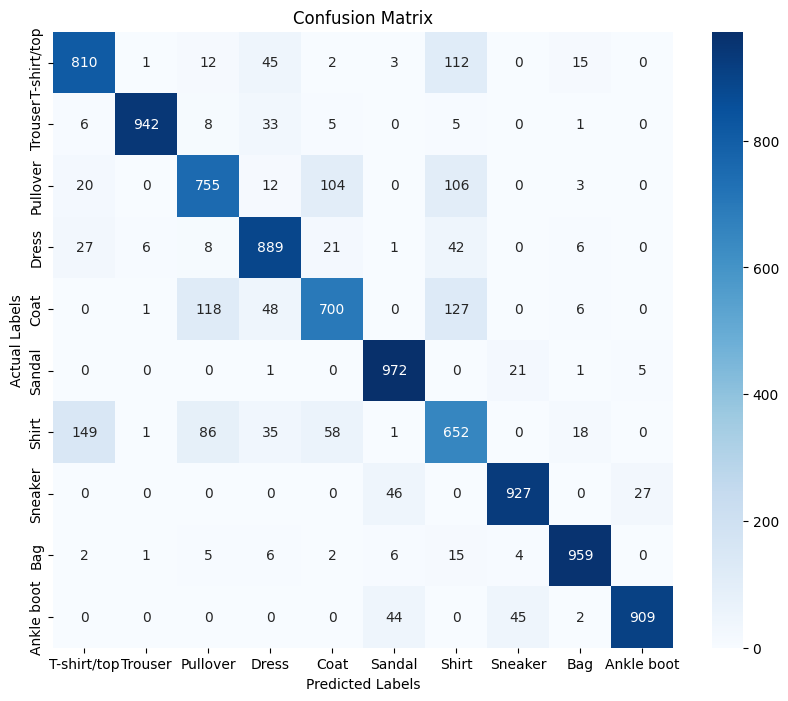

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


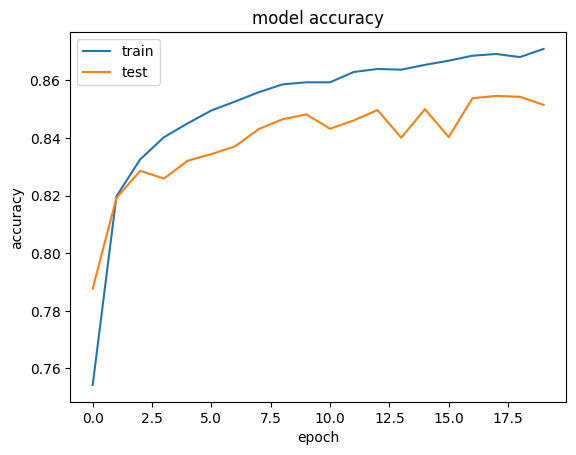

In [ ]:
# plot the history of the training
import matplotlib.pyplot as plt

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()



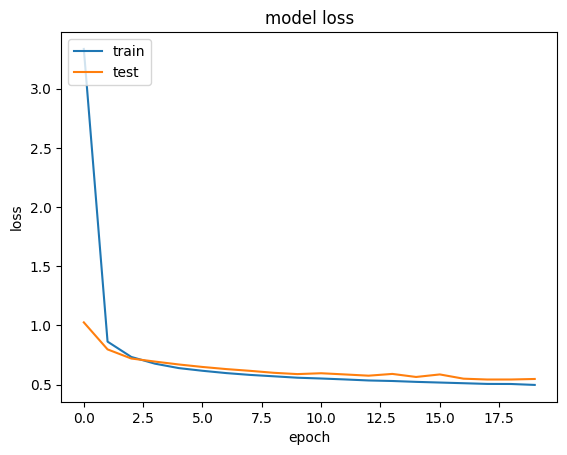

In [ ]:
# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# clear session
keras.backend.clear_session()

# set random seed
keras.utils.set_random_seed(0) # set all random seeds for the program (Python, NumPy, and TensorFlow)

In [ ]:
#early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)